In [46]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from src.utils import load_data_and_metadata

In [19]:
FILE_DIR = "C:\\Users\\jc269556\\Documents\\Fermionic-bosonic-qubit\\"
file_path = "FB_W4_S8_20231002_151301"
data, metadata = load_data_and_metadata(FILE_DIR + file_path + ".hdf5")

In [56]:
data.keys()
freqs=data['frequency_array']
mags=data['magnitude_array']
phase=data['phase_array']
power=data['power_array']

#converting dBm -> V (with R= 50 Ohm)
Amp = 0.05*10**(mags/20)


{'f0_bandwidth': 5,
 'f0_frequency_max': 3.92559,
 'f0_frequency_min': 3.907,
 'f0_frequency_step': 9e-05,
 'f0_instrument': 'Agilent Technologies,N5232A,MY52221339,A.10.65.16\n',
 'f0_power_max': -30,
 'f0_power_min': -65,
 'f0_power_step': 1,
 'operator': 'Joan Caceres',
 'sample': 'FB_W4_S8'}

In [59]:
Amp[i].mean()

4.839917865595714e-05

[-65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48
 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30]


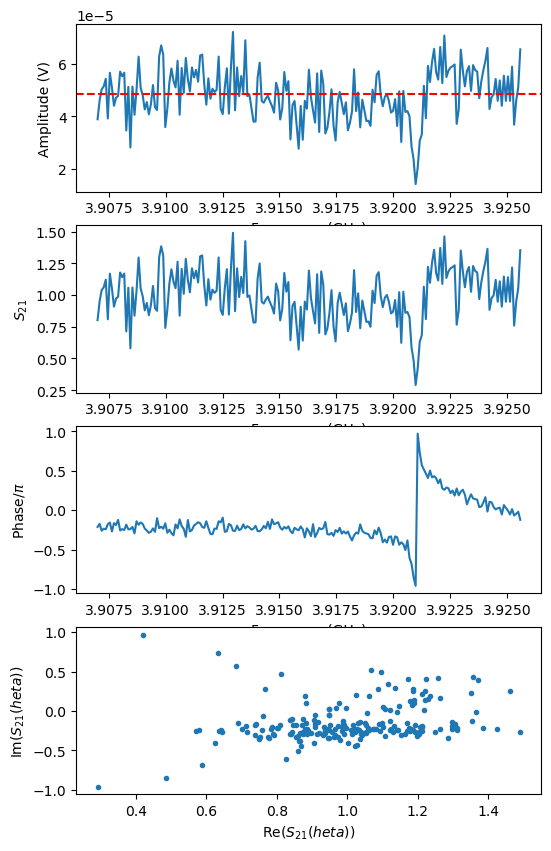

In [134]:
print(power)
i=10

%matplotlib inline
fig,ax = plt.subplots(4,1,figsize = (6,10))#, sharey=True)
ax[0].plot(freqs,Amp[i])
ax[0].axhline(y=Amp[i].mean(), color='r', linestyle='--')
ax[0].set_ylabel('Amplitude (V)')
ax[0].set_xlabel('Frequency (GHz)')

ax[1].plot(freqs,Amp[i]/Amp[i].mean())
ax[1].set_ylabel('$S_{21}$')
ax[1].set_xlabel('Frequency (GHz)')

ax[2].plot(freqs,phase[i]/180)
ax[2].set_ylabel('Phase/$\pi$')
ax[2].set_xlabel('Frequency (GHz)')

ax[3].plot(Amp[i]/Amp[i].mean(),phase[i]/180,'.')
ax[3].set_xlabel('Re($S_{21}(\theta $))')
ax[3].set_ylabel('Im($S_{21}(\theta $))')
plt.show()


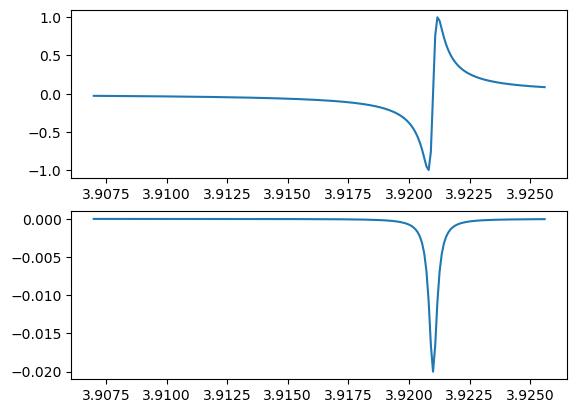

In [163]:
w0 = freqs[np.argmin(Amp[i])]

def imag(w,Q,Qext):
    y = (w-w0)/w0
    return 2*y*Q**2/(1 + 4*Q**2*y**2)/Qext

def real(w,Q,Qext,a):
    y = (w-w0)/w0
    return a*(1 - Q**2/(1 + 4*Q**2*y**2)/Qext)
    
fig, ax = plt.subplots(2,1)

ax[0].plot(freqs,imag(freqs,10000,5000))
ax[1].plot(freqs,real(freqs,10000,5000,0.000001))

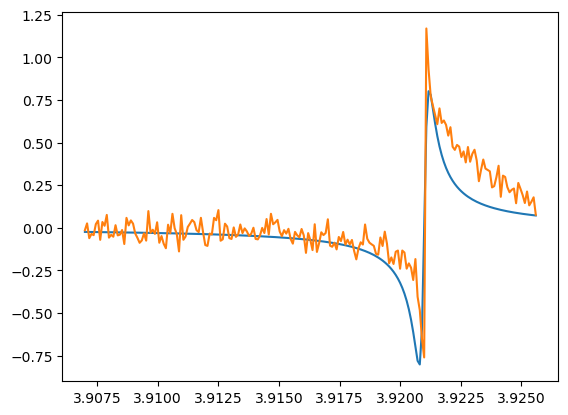

Q, Qext = [9494.96625822 5870.3402738 ] with error 891.6573140899634,397.1649905658583


In [147]:
# Fit for Q by the phase
w0 = freqs[np.argmin(Amp[i])]

def imag(w,Q,Qext):
    y = (w-w0)/w0
    return 2*y*Q**2/(1 + 4*Q**2*y**2)/Qext


popt, pcov = curve_fit(imag, freqs, phase[i]/180 + 0.2, p0 = [7000,3000])
fig, ax = plt.subplots(1,1)
ax.plot(freqs,imag(freqs,popt[0],popt[1]))  # normalized
ax.plot(freqs,phase[i]/180 + 0.2)
plt.show()

print(f'Q, Qext = {popt} with error {np.sqrt(pcov[0,0])},{np.sqrt(pcov[1,1])}')

In [142]:
pcov

array([[294454.34975544, 117774.39584305],
       [117774.39584305,  87826.76587028]])

In [35]:
mags[0].shape

(207,)